In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


In [2]:
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


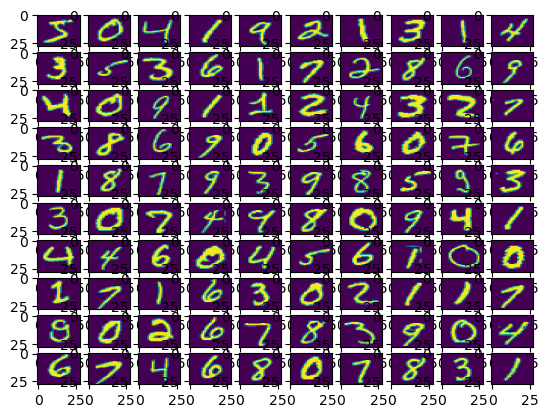

In [3]:
# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()

In [8]:
# Building the Sequential neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),  
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax'),  
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
history=model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9784 - loss: 0.0779 - val_accuracy: 0.9668 - val_loss: 0.1109
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9810 - loss: 0.0706 - val_accuracy: 0.9690 - val_loss: 0.1046
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9820 - loss: 0.0644 - val_accuracy: 0.9699 - val_loss: 0.1007
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9849 - loss: 0.0554 - val_accuracy: 0.9695 - val_loss: 0.1023
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9850 - loss: 0.0534 - val_accuracy: 0.9718 - val_loss: 0.0960
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9883 - loss: 0.0471 - val_accuracy: 0.9707 - val_loss: 0.0970
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9886 - loss: 0.0441 - val_accuracy: 0.9729 - val_loss: 0.0922
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9896 - loss: 0.0398 - val_accuracy: 0.9720 - v

In [16]:
# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.07961028069257736, 0.9757000207901001]


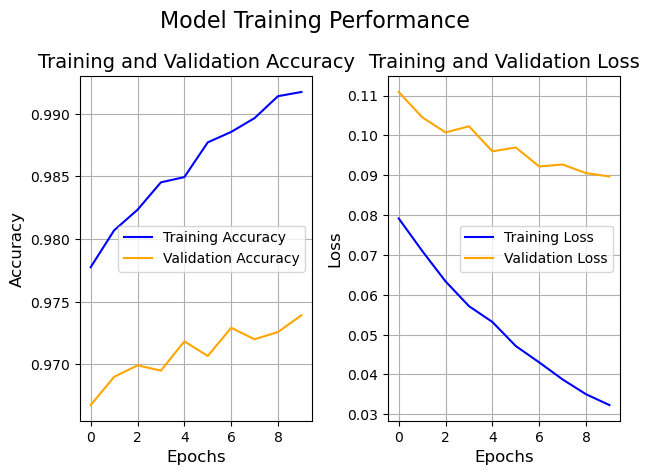

In [17]:
# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()